In [16]:
!pip install requests pandas matplotlib seaborn folium

Error: Unable to fetch data (Status code: 401)
Daily Weather Summary:
           Temperature (°C)               Humidity (%) Wind Speed (m/s)
                       mean    max    min         mean             mean
Timestamp                                                              
2024-11-11        22.120000  22.95  21.29       48.500          3.06500
2024-11-12        24.403750  30.19  18.63       44.250          2.75750
2024-11-13        25.363750  30.99  19.92       47.500          3.18625
2024-11-14        26.327500  30.15  21.17       57.375          3.71875
2024-11-15        26.976250  31.16  23.32       51.625          2.53500
2024-11-16        27.178333  31.38  21.78       36.000          2.27500


<ipython-input-17-e7210d55ba07>:42: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  weather_df.fillna(method='ffill', inplace=True)  # Fill missing values with the previous valid entry


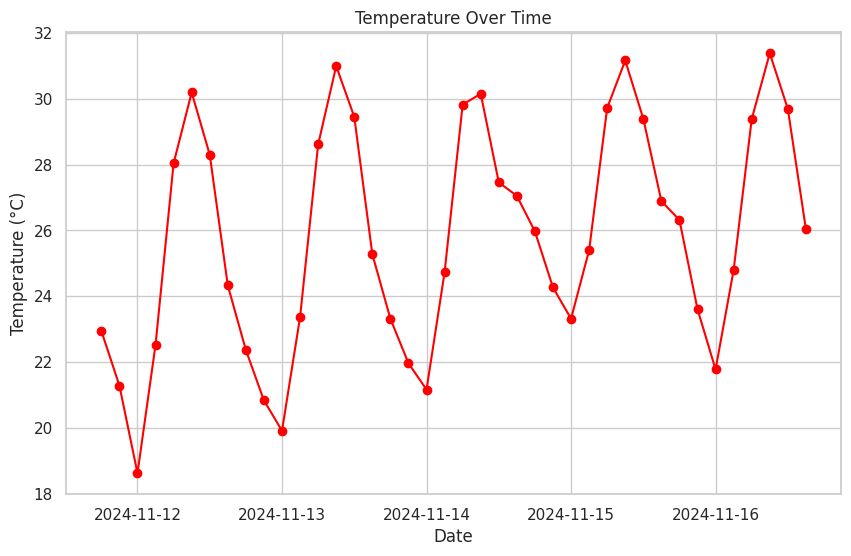

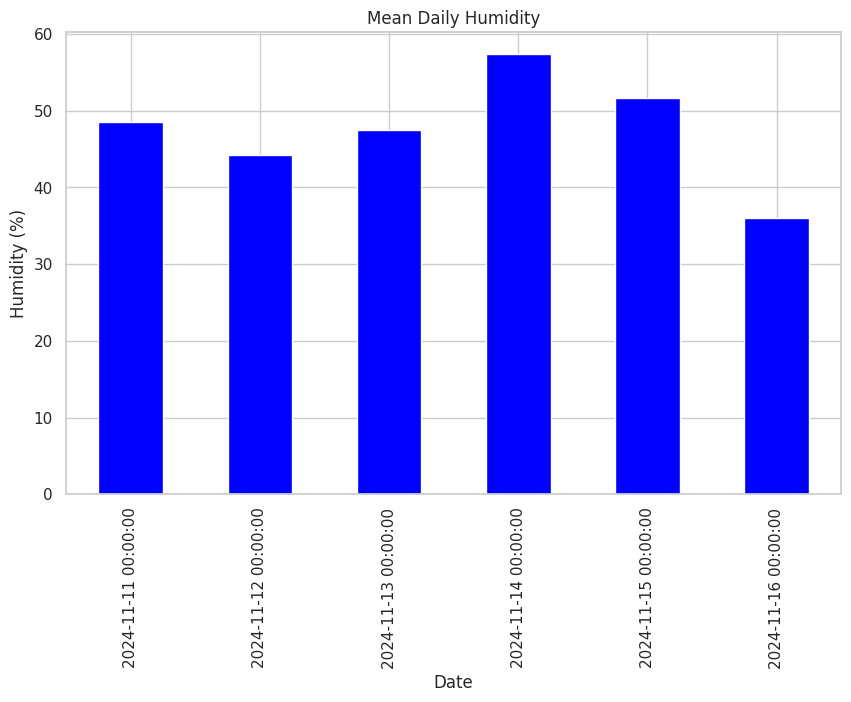

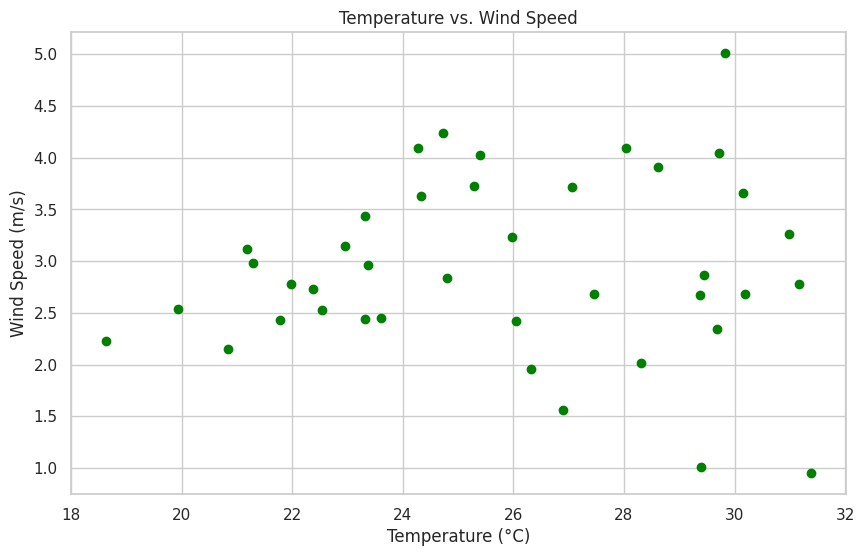

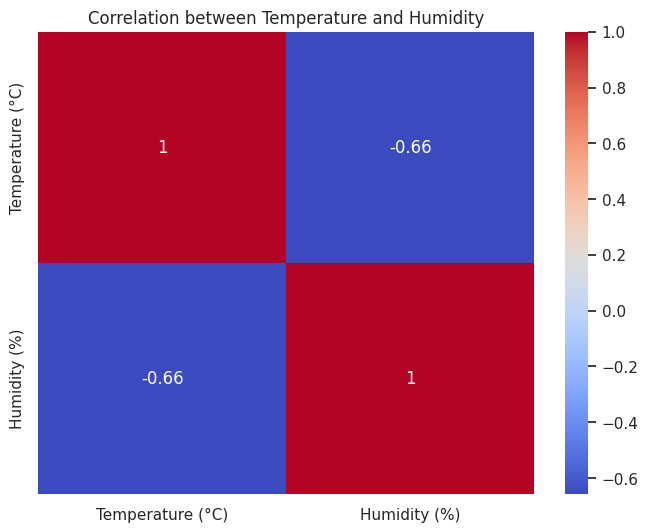

Map saved as weather_map.html


In [17]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from datetime import datetime

# Step 1: Register and Obtain API Key (replace 'your_api_key' with your actual API key)
api_key = 'your_api_key'

# Step 2: Define the Location and API URL
lat = 18.184135  # Example latitude
lon = 74.610764  # Example longitude
api_url = f"http://api.openweathermap.org/data/2.5/forecast?lat={lat}&lon={lon}&appid={api_key}"

# Step 3: Interact with the API and Retrieve Data
response = requests.get(api_url)
if response.status_code == 200:
    weather_data = response.json()
else:
    print(f"Error: Unable to fetch data (Status code: {response.status_code})")
    exit()

# Step 4: Extract Relevant Weather Attributes
timestamps = [datetime.utcfromtimestamp(item['dt']) for item in weather_data['list']]
temperatures = [item['main']['temp'] - 273.15 for item in weather_data['list']]  # Convert Kelvin to Celsius
humidity = [item['main']['humidity'] for item in weather_data['list']]
wind_speed = [item['wind']['speed'] for item in weather_data['list']]
weather_description = [item['weather'][0]['description'] for item in weather_data['list']]

# Step 5: Create DataFrame
weather_df = pd.DataFrame({
    'Timestamp': timestamps,
    'Temperature (°C)': temperatures,
    'Humidity (%)': humidity,
    'Wind Speed (m/s)': wind_speed,
    'Weather Description': weather_description
})
weather_df.set_index('Timestamp', inplace=True)

# Step 6: Data Cleaning and Preprocessing
weather_df.fillna(method='ffill', inplace=True)  # Fill missing values with the previous valid entry

# Step 7: Data Aggregation
daily_summary = weather_df.resample('D').agg({
    'Temperature (°C)': ['mean', 'max', 'min'],
    'Humidity (%)': 'mean',
    'Wind Speed (m/s)': 'mean'
})

# Display daily summary
print("Daily Weather Summary:")
print(daily_summary)

# Step 8: Data Visualization

# Line Plot for Temperature Over Time
plt.figure(figsize=(10, 6))
plt.plot(weather_df.index, weather_df['Temperature (°C)'], color='red', linestyle='-', marker='o')
plt.title('Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()

# Bar Plot for Mean Daily Humidity
daily_mean_humidity = weather_df['Humidity (%)'].resample('D').mean()
plt.figure(figsize=(10, 6))
daily_mean_humidity.plot(kind='bar', color='blue')
plt.title('Mean Daily Humidity')
plt.xlabel('Date')
plt.ylabel('Humidity (%)')
plt.grid(True)
plt.show()

# Scatter Plot for Temperature vs Wind Speed
plt.figure(figsize=(10, 6))
plt.scatter(weather_df['Temperature (°C)'], weather_df['Wind Speed (m/s)'], color='green')
plt.title('Temperature vs. Wind Speed')
plt.xlabel('Temperature (°C)')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)
plt.show()

# Heatmap for Correlation between Temperature and Humidity
plt.figure(figsize=(8, 6))
sns.heatmap(weather_df[['Temperature (°C)', 'Humidity (%)']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between Temperature and Humidity')
plt.show()

# Step 9: Geospatial Visualization (Weather Map)
# Create a map centered around the location
weather_map = folium.Map(location=[lat, lon], zoom_start=10)

# Add weather info as a popup on the map
for i, row in weather_df.iterrows():
    popup_text = f"Date: {i}<br>Temperature: {row['Temperature (°C)']}°C<br>Humidity: {row['Humidity (%)']}%<br>Wind Speed: {row['Wind Speed (m/s)']} m/s<br>Description: {row['Weather Description']}"
    folium.Marker(
        [lat, lon],
        popup=popup_text
    ).add_to(weather_map)

# Save the map to an HTML file (optional)
weather_map.save("weather_map.html")
print("Map saved as weather_map.html")


Here is a detailed explanation of each line of the code provided:

### Imports
```python
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from datetime import datetime
```
- `requests`: This module is used to send HTTP requests to the OpenWeatherMap API and retrieve weather data.
- `pandas`: This is used for data manipulation and analysis, specifically for creating and processing the DataFrame.
- `matplotlib.pyplot`: A plotting library used to create visualizations like line charts and bar plots.
- `seaborn`: Built on top of `matplotlib`, this library is used for creating more complex visualizations, like heatmaps.
- `folium`: A library for creating interactive maps.
- `datetime`: This is used to convert UNIX timestamps (received from the API) into readable date formats.

### Step 1: API Key and Setup
```python
api_key = 'your_api_key'  # Replace 'your_api_key' with your actual OpenWeatherMap API key
```
- You need to replace `'your_api_key'` with the actual API key you obtained from OpenWeatherMap. This key allows you to authenticate requests to the API.

### Step 2: Location and API URL
```python
lat = 18.184135  # Example latitude
lon = 74.610764  # Example longitude
api_url = f"http://api.openweathermap.org/data/2.5/forecast?lat={lat}&lon={lon}&appid={api_key}"
```
- `lat` and `lon` are the latitude and longitude coordinates of the location you want to get weather data for (in this case, an example location).
- `api_url`: This is the URL to send the GET request to OpenWeatherMap’s API. It includes the latitude (`lat`), longitude (`lon`), and your `api_key` for authentication.

### Step 3: Sending API Request and Retrieving Data
```python
response = requests.get(api_url)
if response.status_code == 200:
    weather_data = response.json()
else:
    print(f"Error: Unable to fetch data (Status code: {response.status_code})")
    exit()
```
- `requests.get(api_url)`: This sends the GET request to the OpenWeatherMap API using the previously defined URL.
- `if response.status_code == 200`: This checks if the request was successful (status code 200 indicates success).
- `weather_data = response.json()`: If the request is successful, the response content is converted from JSON format into a Python dictionary (`weather_data`).
- If the status code is not 200, it prints an error message and exits the script.

### Step 4: Extracting Relevant Weather Attributes
```python
timestamps = [datetime.utcfromtimestamp(item['dt']) for item in weather_data['list']]
temperatures = [item['main']['temp'] - 273.15 for item in weather_data['list']]  # Convert Kelvin to Celsius
humidity = [item['main']['humidity'] for item in weather_data['list']]
wind_speed = [item['wind']['speed'] for item in weather_data['list']]
weather_description = [item['weather'][0]['description'] for item in weather_data['list']]
```
- `timestamps`: Extracts the `dt` (timestamp) from each weather record and converts it from UNIX time to a human-readable date format using `datetime.utcfromtimestamp()`.
- `temperatures`: Extracts the temperature in Kelvin and converts it to Celsius by subtracting 273.15 from the value.
- `humidity`: Extracts the humidity percentage from the `'main'` dictionary of each weather record.
- `wind_speed`: Extracts the wind speed from the `'wind'` dictionary of each weather record.
- `weather_description`: Extracts a brief description of the weather (e.g., "clear sky", "light rain") from the `'weather'` dictionary.

### Step 5: Creating the DataFrame
```python
weather_df = pd.DataFrame({
    'Timestamp': timestamps,
    'Temperature (°C)': temperatures,
    'Humidity (%)': humidity,
    'Wind Speed (m/s)': wind_speed,
    'Weather Description': weather_description
})
weather_df.set_index('Timestamp', inplace=True)
```
- `weather_df`: A Pandas DataFrame is created using the extracted weather data. The columns represent different weather attributes such as timestamps, temperatures, humidity, etc.
- `.set_index('Timestamp', inplace=True)`: This sets the `'Timestamp'` column as the index of the DataFrame, making it easier to work with time series data.

### Step 6: Data Cleaning and Preprocessing
```python
weather_df.fillna(method='ffill', inplace=True)  # Fill missing values with the previous valid entry
```
- `fillna(method='ffill', inplace=True)`: This function handles any missing data by forward filling, i.e., replacing missing values with the last known valid value in the DataFrame.

### Step 7: Data Aggregation
```python
daily_summary = weather_df.resample('D').agg({
    'Temperature (°C)': ['mean', 'max', 'min'],
    'Humidity (%)': 'mean',
    'Wind Speed (m/s)': 'mean'
})
```
- `.resample('D')`: This resamples the data to daily frequency (D stands for day). It groups the data by day.
- `.agg()`: This applies aggregation functions to each column:
  - For `'Temperature (°C)'`, it calculates the mean, maximum, and minimum temperature of each day.
  - For `'Humidity (%)'` and `'Wind Speed (m/s)'`, it calculates the daily mean values.

### Step 8: Data Visualization

#### Line Plot for Temperature Over Time
```python
plt.figure(figsize=(10, 6))
plt.plot(weather_df.index, weather_df['Temperature (°C)'], color='red', linestyle='-', marker='o')
plt.title('Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()
```
- `plt.figure(figsize=(10, 6))`: Creates a figure with the specified size.
- `plt.plot()`: Plots the temperature data over time, using a red line with circle markers.
- `plt.title()`, `plt.xlabel()`, `plt.ylabel()`: Sets the title and labels for the x-axis and y-axis.
- `plt.grid(True)`: Adds gridlines to the plot.
- `plt.show()`: Displays the plot.

#### Bar Plot for Mean Daily Humidity
```python
daily_mean_humidity = weather_df['Humidity (%)'].resample('D').mean()
plt.figure(figsize=(10, 6))
daily_mean_humidity.plot(kind='bar', color='blue')
plt.title('Mean Daily Humidity')
plt.xlabel('Date')
plt.ylabel('Humidity (%)')
plt.grid(True)
plt.show()
```
- `daily_mean_humidity`: Resamples and calculates the mean humidity for each day.
- `plot(kind='bar')`: Creates a bar plot to visualize the daily average humidity.
- The rest of the code is similar to the line plot in terms of adding title, labels, and gridlines.

#### Scatter Plot for Temperature vs Wind Speed
```python
plt.figure(figsize=(10, 6))
plt.scatter(weather_df['Temperature (°C)'], weather_df['Wind Speed (m/s)'], color='green')
plt.title('Temperature vs. Wind Speed')
plt.xlabel('Temperature (°C)')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)
plt.show()
```
- `plt.scatter()`: Creates a scatter plot to visualize the relationship between temperature and wind speed.

#### Heatmap for Temperature vs Humidity
```python
plt.figure(figsize=(8, 6))
sns.heatmap(weather_df[['Temperature (°C)', 'Humidity (%)']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between Temperature and Humidity')
plt.show()
```
- `sns.heatmap()`: Creates a heatmap to visualize the correlation between temperature and humidity. The `corr()` method computes the correlation matrix between the two variables.
- `annot=True`: Displays the correlation values on the heatmap.
- `cmap='coolwarm'`: Specifies the color palette for the heatmap.

### Step 9: Geospatial Visualization (Weather Map)
```python
weather_map = folium.Map(location=[lat, lon], zoom_start=10)
```
- `folium.Map()`: Creates an interactive map centered around the specified latitude and longitude, with a zoom level of 10.

```python
for i, row in weather_df.iterrows():
    popup_text = f"Date: {i}<br>Temperature: {row['Temperature (°C)']}°C<br>Humidity: {row['Humidity (%)']}%<br>Wind Speed: {row['Wind Speed (m/s)']} m/s<br>Description: {row['Weather Description']}"
    folium.Marker([lat, lon], popup=popup_text).add_to(weather_map)
```
- This loop iterates through the rows of the DataFrame, creating a popup text for each timestamp containing weather information.
- `folium.Marker()`: Adds a marker at the specified location on the map. The popup displays the weather data.
- `.add_to(weather_map)`: Adds the marker to the map.

```python
weather_map.save("weather_map.html")
print("Map saved as weather_map.html")
```
- `weather_map.save()`: Saves the map to an HTML file.
- The map can be opened in a browser to interact with it.

### Summary
This code retrieves weather data for a specific location, processes it, performs data aggregation